<a href="https://colab.research.google.com/github/Aqdashere/machine_learning/blob/main/Mini_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("student_success_dataset.csv")

print("Sample Rows")
print(df.head())

print("Dataset Shape")
print(f'Rows: {df.shape[0]}, Colums:{df.shape[1]}')

print("Dataset Info")
print(df.info())

print("Dataset Description")
print(df.describe(include='all'))

print("Missing Values")
print(df.isnull().sum())

Sample Rows
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes
Dataset Shape
Rows: 20, Colums:6
Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
Dataset Description
        StudyHours  Attendance  PastScore Internet  Sle

After Label encoding
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



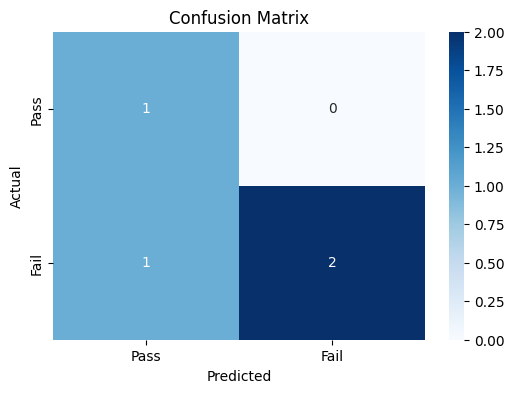

---------Predict your Result------------
Enter Study Hours: 5
Enter Attendance: 70
Enter Past Score: 50
Enter Sleep Hours: 4.5
Enter Internet (Yes/No): yes
Precition Based on input:Fail


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_success_dataset.csv")

le = LabelEncoder() #we had internet and passed colums value in yes/no while we can only provide number value thats why we will do label encoding
df['Internet'] = le.fit_transform(df['Internet']) #yes = 1, no = 0
df['Passed'] = le.fit_transform(df['Passed']) #if we more than 2 values than we will use getdummies() not "Label encoder"

print("After Label encoding")
print(df.head())

features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours', 'Internet']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y= df_scaled['Passed']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Classification Report")
print(classification_report(y_test,y_pred))

confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass','Fail'], yticklabels=['Pass','Fail'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('---------Predict your Result------------')
try:
  study_hours = float(input('Enter Study Hours: '))
  attendance = float(input('Enter Attendance: '))
  past_score = float(input('Enter Past Score: '))
  sleep_hours = float(input('Enter Sleep Hours: '))
  internet = input('Enter Internet (Yes/No): ')
  internet = 1 if internet.lower() == 'yes' else 0

  user_input_df = pd.DataFrame([{
    'StudyHours': study_hours,
    'Attendance': attendance,
    'PastScore': past_score,
    'SleepHours': sleep_hours,
    'Internet': internet

  }])

  user_input_scaled = scaler.transform(user_input_df)
  prediction = model.predict(user_input_scaled)[0]

  result = "Pass" if prediction ==1 else "Fail"
  print(f"Precition Based on input:{result}")
except Exception as e:
  print(f"Error: {e}")